In [13]:
from experiment import *

from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

tf.get_logger().setLevel("ERROR")

# tf.config.set_visible_devices([], "GPU")

In [14]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [15]:
base_experiment_parameters = {
    "vocab_size": 3000,
    "sequence_length": 300,
    "hidden_layers": [3000, 1500],
    "embedding_dim": 2,
    "dropout_rate": 0.5,
}

experiment_parameters = {
    "vocab_size": 6264,
    "sequence_length": 566,
    "hidden_layers": [6264, 3132],
    "embedding_dim": 2,
    "dropout_rate": 0.4,
}

edge_candidate = {
    "vocab_size": 6896,
    "sequence_length": 623,
    "hidden_layers": [6896, 3448],
    "embedding_dim": 2,
    "dropout_rate": .3,
}

Epoch 1/6
352/352 [==============================] - 23s 66ms/step - loss: 0.6896 - accuracy: 0.5213 - val_loss: 0.5910 - val_accuracy: 0.7372
Epoch 2/6
352/352 [==============================] - 23s 66ms/step - loss: 0.4056 - accuracy: 0.8110 - val_loss: 0.3164 - val_accuracy: 0.8740
Epoch 3/6
352/352 [==============================] - 23s 66ms/step - loss: 0.3113 - accuracy: 0.8611 - val_loss: 0.3032 - val_accuracy: 0.8840
Epoch 4/6
352/352 [==============================] - 23s 66ms/step - loss: 0.2790 - accuracy: 0.8762 - val_loss: 0.2932 - val_accuracy: 0.8920
Epoch 5/6
352/352 [==============================] - 23s 66ms/step - loss: 0.2608 - accuracy: 0.8854 - val_loss: 0.2895 - val_accuracy: 0.8956
Epoch 6/6
782/782 [==============================] - 4s 5ms/step - loss: 0.3155 - accuracy: 0.8750
Final accuracy: train 0.8919 validation 0.8816 test 0.8750


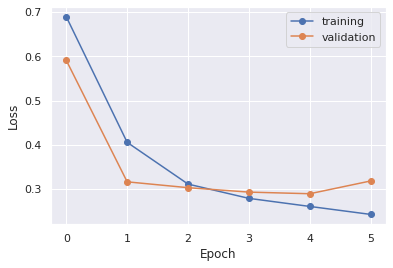

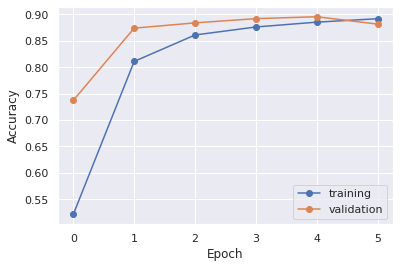

Final training accuracy: 0.8919
Final validation accuracy: 0.8816
Model parameter count: 23,818,785


(<keras.engine.sequential.Sequential at 0x7fa150185fd0>,
 0.881600022315979,
 0.875)

In [12]:
experiment(**next_candidate, verbose=1, epochs=6)

Epoch 1/5
352/352 [==============================] - 23s 65ms/step - loss: 0.6896 - accuracy: 0.5213 - val_loss: 0.5910 - val_accuracy: 0.7372
Epoch 2/5
352/352 [==============================] - 23s 65ms/step - loss: 0.4056 - accuracy: 0.8110 - val_loss: 0.3164 - val_accuracy: 0.8740
Epoch 3/5
352/352 [==============================] - 23s 65ms/step - loss: 0.3113 - accuracy: 0.8611 - val_loss: 0.3032 - val_accuracy: 0.8840
Epoch 4/5
352/352 [==============================] - 23s 65ms/step - loss: 0.2790 - accuracy: 0.8762 - val_loss: 0.2932 - val_accuracy: 0.8920
Epoch 5/5
782/782 [==============================] - 4s 5ms/step - loss: 0.2811 - accuracy: 0.8883
Final accuracy: train 0.8854 validation 0.8956 test 0.8883


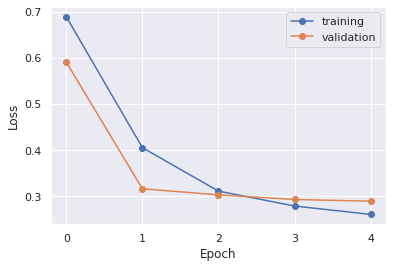

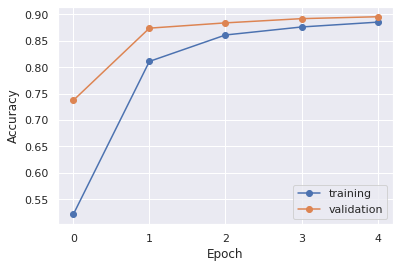

Final training accuracy: 0.8854
Final validation accuracy: 0.8956
Model parameter count: 23,818,785


(<keras.engine.sequential.Sequential at 0x7fa1516233a0>,
 0.8956000208854675,
 0.8883200287818909)

In [17]:
experiment(**edge_candidate, verbose=1)

In [18]:
results, max_value_key = next_step(**edge_candidate, verbose=0, test_run=False)

{"vocab_size": 6896, "sequence_length": 623, "hidden_layers": [6896], "embedding_dim": 1, "dropout_rate": 0.2, "epochs": 5, "verbose": 0}
Final accuracy: train 0.8274 validation 0.8868 test 0.8864
{"vocab_size": 6896, "sequence_length": 623, "hidden_layers": [6896, 3448], "embedding_dim": 1, "dropout_rate": 0.2, "epochs": 5, "verbose": 0}
Final accuracy: train 0.8341 validation 0.8916 test 0.8868
{"vocab_size": 6896, "sequence_length": 623, "hidden_layers": [6896, 3448, 1724], "embedding_dim": 1, "dropout_rate": 0.2, "epochs": 5, "verbose": 0}
Final accuracy: train 0.4989 validation 0.5124 test 0.5000
{"vocab_size": 6896, "sequence_length": 623, "hidden_layers": [100], "embedding_dim": 1, "dropout_rate": 0.2, "epochs": 5, "verbose": 0}
Final accuracy: train 0.7996 validation 0.8668 test 0.8736
{"vocab_size": 6896, "sequence_length": 623, "hidden_layers": [100, 20], "embedding_dim": 1, "dropout_rate": 0.2, "epochs": 5, "verbose": 0}
Final accuracy: train 0.8197 validation 0.8856 test 0.

In [10]:
[(key, val) for key, val in results.items() if val > .895]

[('{"vocab_size": 6896, "sequence_length": 623, "hidden_layers": [6896, 3448], "embedding_dim": 2, "dropout_rate": 0.3, "epochs": 5, "verbose": 0}',
  0.8956000208854675)]

Epoch 1/6
352/352 [==============================] - 23s 66ms/step - loss: 0.6896 - accuracy: 0.5213 - val_loss: 0.5910 - val_accuracy: 0.7372
Epoch 2/6
352/352 [==============================] - 23s 66ms/step - loss: 0.4056 - accuracy: 0.8110 - val_loss: 0.3164 - val_accuracy: 0.8740
Epoch 3/6
352/352 [==============================] - 23s 66ms/step - loss: 0.3113 - accuracy: 0.8611 - val_loss: 0.3032 - val_accuracy: 0.8840
Epoch 4/6
352/352 [==============================] - 23s 66ms/step - loss: 0.2790 - accuracy: 0.8762 - val_loss: 0.2932 - val_accuracy: 0.8920
Epoch 5/6
352/352 [==============================] - 23s 66ms/step - loss: 0.2608 - accuracy: 0.8854 - val_loss: 0.2895 - val_accuracy: 0.8956
Epoch 6/6
782/782 [==============================] - 4s 5ms/step - loss: 0.3155 - accuracy: 0.8750
Final accuracy: train 0.8919 validation 0.8816 test 0.8750


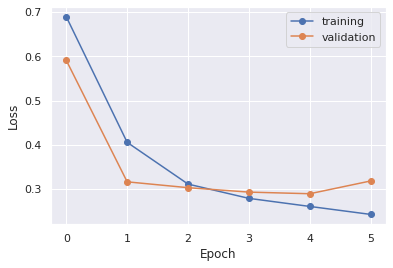

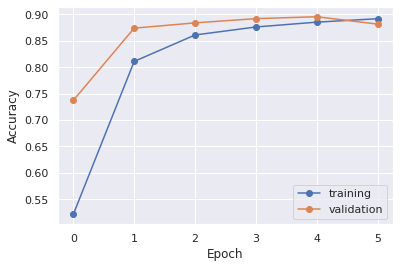

Final training accuracy: 0.8919
Final validation accuracy: 0.8816
Model parameter count: 23,818,785


(<keras.engine.sequential.Sequential at 0x7fa150185fd0>,
 0.881600022315979,
 0.875)

In [12]:
experiment(**next_candidate, verbose=1, epochs=6)

In [ ]:
#for _ in range(10):
#    (
#        next_sequence_length,
#        next_vocab_size,
#        next_hidden_units,
#        next_embeddings,
#    ) = next_step(sequence_length, vocab_size, hidden_units, embeddings, 1.25)

#    if (
#        next_sequence_length == sequence_length
#        and next_vocab_size == vocab_size
#        and next_hidden_units == hidden_units
#        and next_embeddings == embeddings
#    ):
#        break

#    sequence_length = next_sequence_length
#    vocab_size = next_vocab_size
#    hidden_units = next_hidden_units
#    embeddings = next_embeddings